In [1]:
!pip install pandas 

In [2]:
import pandas as pd

# Carica il dataset da un file CSV
cyclists = pd.read_csv('dataset\dataset\cyclists.csv')
races = pd.read_csv('dataset\dataset/races.csv')

# Mostra le prime righe del dataset
cyclists.head()


,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain


In [3]:
cyclists.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


In [4]:
cyclists.select_dtypes(include="number")


,birth_year,weight,height
0,1964.0,NaN,NaN
1,1965.0,74.0,182.0
2,1996.0,69.0,189.0
3,1995.0,78.0,192.0
4,1997.0,55.0,171.0
...,...,...,...
6129,1966.0,NaN,NaN
6130,1998.0,75.0,188.0
6131,1973.0,NaN,NaN
6132,1985.0,58.0,170.0


In [5]:
# Let's see how many missing values there are

cyclists.isnull().sum()

_url              0
name              0
birth_year       13
weight         3056
height         2991
nationality       1
dtype: int64

Almost half of the values for weight and height are missing, can we replace them somehow?
Regarding the birth year, only 13 values are missing, we can easily drop those records without losing too much, but maybe we don't need birth year for the analysis? Same for nationality.

In [6]:
!pip install seaborn

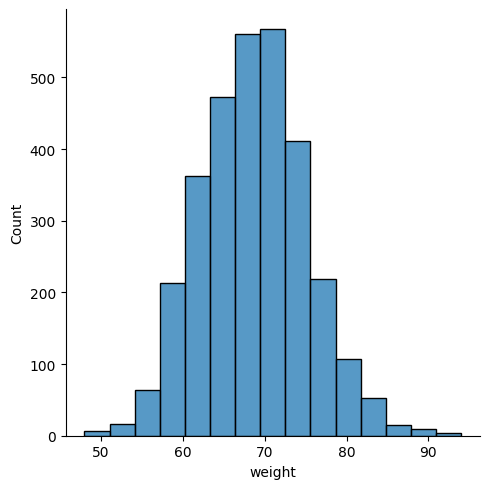

In [7]:
import seaborn

seaborn.displot(cyclists, 
                x="weight", 
                kind="hist",
                row_order="desc",
                bins=15)

In [8]:
!pip install scipy

In [9]:
# Let's see the correlation between numerical data

from dataunderstanding import correlations

correlations = correlations(cyclists)
correlations


,birth_year,weight,height,correlation_type
birth_year,1.000000,-0.063740,0.094976,kendall
weight,-0.063740,1.000000,0.539760,kendall
height,0.094976,0.539760,1.000000,kendall
birth_year,1.000000,-0.104242,0.154252,pearson
weight,-0.104242,1.000000,0.720732,pearson
height,0.154252,0.720732,1.000000,pearson
birth_year,1.000000,-0.091220,0.137001,spearman
weight,-0.091220,1.000000,0.705189,spearman
height,0.137001,0.705189,1.000000,spearman


# High correlation between height and weight
As we can expect, weight and height are highly correlated, maybe we can merge the two features into one index?

In [10]:
!pip freeze > requirements.txt


In [13]:
from utils import merge_dataset


mergedDf = merge_dataset(cyclists,races,"_url","cyclist")
mergedDf.head()

,_url_x,name_x,birth_year,weight,height,nationality,_url_y,name_y,points,uci_points,...,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy,vuelta-a-espana/1989/stage-1,Vuelta a España,80.0,NaN,...,NaN,1989-04-24 00:25:33,110,bruno-surra,25.0,True,False,False,NaN,15.0
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France,tour-de-france/1997/stage-2,Tour de France,100.0,NaN,...,NaN,1997-07-07 06:27:47,132,gerard-rue,32.0,True,False,False,denmark-1991,0.0
2,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France,tour-de-france/1990/stage-1,Tour de France,100.0,NaN,...,NaN,1990-07-01 03:29:36,66,gerard-rue,25.0,True,False,False,france-1978,635.0
3,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France,tour-de-france/1992/stage-7,Tour de France,100.0,NaN,...,NaN,1992-07-11 04:22:52,35,gerard-rue,27.0,True,False,False,france-1978,65.0
4,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France,tour-de-france/1990/stage-9,Tour de France,100.0,NaN,...,NaN,1990-07-09 04:46:44,41,gerard-rue,25.0,True,False,False,france-1978,37.0


In [16]:
cyclists.info

<bound method DataFrame.info of                          _url                  name  birth_year  weight  \
0                 bruno-surra          Bruno  Surra      1964.0     NaN   
1                  gerard-rue           Gérard  Rué      1965.0    74.0   
2                    jan-maas             Jan  Maas      1996.0    69.0   
3        nathan-van-hooydonck  Nathan Van Hooydonck      1995.0    78.0   
4            jose-felix-parra     José Félix  Parra      1997.0    55.0   
...                       ...                   ...         ...     ...   
6129  juan-jose-martinez-diaz   Juan José  Martínez      1966.0     NaN   
6130           inigo-elosegui       Iñigo  Elosegui      1998.0    75.0   
6131           paolo-alberati       Paolo  Alberati      1973.0     NaN   
6132        jackson-rodriguez    Jackson  Rodríguez      1985.0    58.0   
6133             ward-vanhoof         Ward  Vanhoof      1999.0    75.0   

      height  nationality  
0        NaN        Italy  
1      182.